In [1]:
import cv2, numpy as np
import time
from matplotlib import pyplot as plt
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

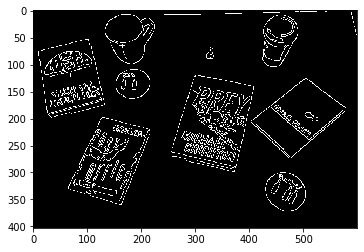

In [3]:
image = cv2.imread("./data/book.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)
edged = cv2.Canny(gray, 10, 250) 
#외곽선정보 따는거, 가우시안 안쓰면 엣지들이 많이 나옴. 250보다 크면 무조건 엣지를 보겠다. 10보다 작으면 엣지를 안본다

imshow('', edged) 

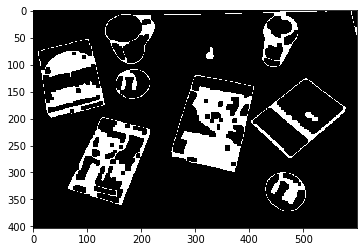

In [4]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel) #폐쇄 , 구멍 메꿀때

imshow('', closed)

I found 4 books in that image


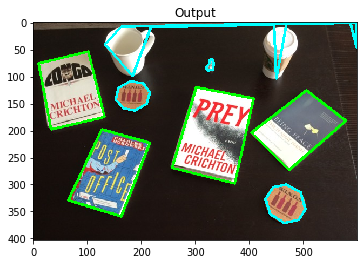

In [9]:
cnts, _ = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #copy()를 통해 복사본 사용, 원본영상이 바뀌기 때문
total = 0

for c in cnts:
    peri = cv2.arcLength(c, True) # 
    approx = cv2.approxPolyDP(c, 0.02 * peri, True) #길이가 얼마인지

    if len(approx) == 4:
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)
        total += 1
    
        
print("I found {0} books in that image".format(total))
imshow("Output", image)

I found 4 books in that image


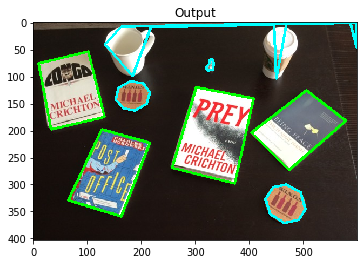

In [10]:
image = cv2.imread("./data/book.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)
edged = cv2.Canny(gray, 10, 250)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
cnts, _ = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
total = 0

for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    if len(approx) == 4:
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)
        total += 1
    else:
        cv2.drawContours(image, [approx], -1, (255, 255, 0), 4)    
        
print("I found {0} books in that image".format(total))
imshow("Output", image)

In [11]:
from collections import Counter

def detect_weiqi(img):  
    txt = 'black'
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, threshold = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

    c = Counter(list(threshold.flatten()))
    print(c.most_common())
    if c.most_common()[0][0] != 0:
        txt = 'white'
    return txt, threshold

In [64]:
img = cv2.imread('./data/stone.png')
#img = cv2.imread('./data/coin.png')
#img = cv2.imread('./data/water_coins.jpg')

img = cv2.medianBlur(img, 5)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 해상도,  원간 최소 거리      edge threshold       circle 중심점 histogram수,
# 1,        20,             param1=100,  param2=30, minRadius=10, maxRadius=50
# param1 : edge threshold low ->  edge가 검출되어 같은 원이 검출됨
# param2 : 중심점 histogram 수가 작으면 많은 원이 검출됨
    
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 1, 20, param1=100, param2=30, minRadius=10, maxRadius=50)
#원을 찾아주는 전용 함수, x,y 반지름

print(circles)#중심좌표와 지름을 생성

[[[295.5 257.5  28.4]
  [359.5 338.5  28.6]
  [301.5 138.5  27.9]
  [356.5 272.5  29.1]
  [239.5 273.5  28.6]
  [176.5 262.5  28.1]
  [256.5 329.5  29.4]
  [176.5 132.5  28. ]
  [426.5 272.5  28.5]
  [240.5 136.5  28.8]
  [308.5  77.5  27.5]
  [263.5 387.5  29.2]
  [241.5 199.5  28. ]
  [179.5 203.5  28. ]
  [ 83.5 132.5  27.2]
  [324.5 382.5  29.4]
  [367.5 148.5  28.4]
  [249.5  69.5  29.1]]]


[[[296 258  28]
  [360 338  29]
  [302 138  28]
  [356 272  29]
  [240 274  29]
  [176 262  28]
  [256 330  29]
  [176 132  28]
  [426 272  28]
  [240 136  29]
  [308  78  28]
  [264 388  29]
  [242 200  28]
  [180 204  28]
  [ 84 132  27]
  [324 382  29]
  [368 148  28]
  [250  70  29]]]


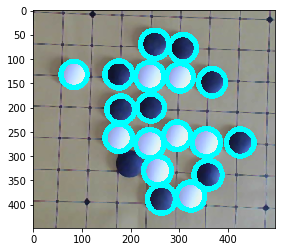

In [65]:
circles = np.uint16(np.around(circles))
print(circles) #중심좌표와 지름을 생성

font = cv2.FONT_HERSHEY_SIMPLEX
for i in circles[0, :]:
    x, y, r = i
    crop_img = img[y - r:y + r, x - r:x + r]    
    #txt, threshold = detect_weiqi(crop_img)
    
    cv2.circle(img, (x, y), int(r), (255, 255, 0), 10)
    
#     if txt == 'black' :  
#         cv2.circle(img, (i[0], i[1]),int(i[2]*0.7), (0, 0, 255), -1) #-1은 점 전부 칠해라 #0.7은 70프로정도만 
#     else :
#         cv2.circle(img, (i[0], i[1]), int(i[2]*0.7), (255, 0, 0), -1)            


imshow("", img)

[[[295.5 257.5  28.4]
  [359.5 338.5  28.6]
  [301.5 138.5  27.9]
  [356.5 272.5  29.1]
  [239.5 273.5  28.6]
  [176.5 262.5  28.1]
  [256.5 329.5  29.4]
  [176.5 132.5  28. ]
  [426.5 272.5  28.5]
  [240.5 136.5  28.8]
  [308.5  77.5  27.5]
  [263.5 387.5  29.2]
  [241.5 199.5  28. ]
  [179.5 203.5  28. ]
  [ 83.5 132.5  27.2]
  [324.5 382.5  29.4]
  [367.5 148.5  28.4]
  [249.5  69.5  29.1]]]
[[[296 258  28]
  [360 338  29]
  [302 138  28]
  [356 272  29]
  [240 274  29]
  [176 262  28]
  [256 330  29]
  [176 132  28]
  [426 272  28]
  [240 136  29]
  [308  78  28]
  [264 388  29]
  [242 200  28]
  [180 204  28]
  [ 84 132  27]
  [324 382  29]
  [368 148  28]
  [250  70  29]]]
[(255, 2164), (0, 972)]
[(0, 2865), (255, 499)]
[(255, 2166), (0, 970)]
[(255, 2362), (0, 1002)]
[(255, 2255), (0, 1109)]
[(255, 2121), (0, 1015)]
[(255, 2258), (0, 1106)]
[(0, 2869), (255, 267)]
[(0, 2749), (255, 387)]
[(255, 2366), (0, 998)]
[(0, 2893), (255, 243)]
[(0, 3025), (255, 339)]
[(0, 2881), (255, 25

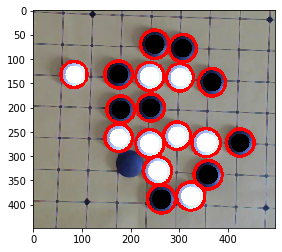

In [61]:
####강사님 cheat

from collections import Counter

def detect_weiqi(img):  
    txt = 'black'
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    _, threshold = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)

    c = Counter(list(threshold.flatten()))
    print(c.most_common())
    if c.most_common()[0][0] != 0:
        txt = 'white'
    return txt, threshold


img = cv2.imread('./data/stone.png')
img = cv2.medianBlur(img, 5)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# 해상도,  원간 최소 거리      edge threshold       circle 중심점 histogram수,
# 1,        20,             param1=100,  param2=30, minRadius=10, maxRadius=50
# param1 : edge threshold low ->  edge가 검출되어 같은 원이 검출됨
# param2 : 중심점 histogram 수가 작으면 많은 원이 검출됨

circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT,
                           1, 20, param1=100, param2=30, 
                           minRadius=10, maxRadius=50)

print(circles)


circles = np.uint16(np.around(circles))
print(circles)

font = cv2.FONT_HERSHEY_SIMPLEX
for i in circles[0, :]:
    x, y, r = i    
    cv2.circle(img, (x, y), r, (0, 0, 255), 5)
    
    crop_img = img[y - r:y + r, x - r:x + r]    
    txt, threshold = detect_weiqi(crop_img)
    
    if txt == 'black' :  
        cv2.circle(img, (x, y),int(r*0.7), (0, 0, 0), -1)
    else :
        cv2.circle(img, (x, y), int(r*0.7), (255, 255, 255), -1)            


imshow("", img)